In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
def sam(N,d):
#this function generates random vectors in compacted matrix V
#input:
#    N: number of vector you want to generate
#    d: dimension of vector you want to generate
#output:
#    V: a matrix whose columns are the vectors you just generated
    V=np.zeros((d,0))
    for i in range(N):
        v=2*np.random.rand(d,1)-1  #because rand only gives random values of range [0,1)
        V=np.c_[V,v]
    return V

def aver_minang(V):
#this function gives average minimal angle of the vectors in V
#input:
#    V: a matrix whose columns are the vectors you just generated
#output:
#    aver: average minimal angle of the vectors in V
    d=np.size(V,0)
    N=np.size(V,1)
    csita=np.zeros((N,N))     #cos sita value
    for i in range(N):
        vi=V[:,i]
        for j in range(N):
            if i!=j:
                vj=V[:,j]
                csita[i,j]=abs((vi.T).dot(vj)/(np.linalg.norm(vi)*np.linalg.norm(vj)))
            else:
                csita[i,j]=0 #the angle with oneself is excluded because it's always 0 degree
    csita_max=np.amax(csita,1) #For each of the 100 vectors determine the minimum angle to all other vectors.
    sita_min=np.arccos(csita_max)
    aver=np.mean(sita_min) #compute the average of these minimum angles.
    return aver

def getaver(N,d):
    V=sam(N,d)
    aver=180/math.pi*aver_minang(V)#change from rad to degree
    return aver

def plotgragh(N,d):
    a=np.arange(1,d+1).reshape((1,d))#row vector
    b=np.zeros((1,0)) 
    for i in range(d):
        aver=getaver(N,i+1)
        b=np.c_[b,aver]
    plt.plot(a,b,'ro')
    plt.show()

[[ 0.61054425  0.61232141  0.68210311 -0.60748943 -0.88157398  0.33450944
  -0.31682815  0.51674405 -0.63711111  0.87480466  0.04699929 -0.0654018
  -0.58055971 -0.02559529 -0.28028674 -0.05744912  0.17476096 -0.03424802
   0.99193737 -0.1431979   0.83649312 -0.76211056 -0.07895677  0.7941137
   0.54801228 -0.99394695 -0.09641775 -0.74162411  0.14728571 -0.61025136
  -0.85870438  0.00175996 -0.66125573 -0.26236997 -0.40942941  0.87560087
  -0.09411207 -0.39634544  0.62110461  0.03761304 -0.20574802  0.95167578
   0.78730715  0.93405255  0.58852032  0.62625493  0.86418687  0.79603078
   0.74437646  0.64631052  0.98617606  0.07747066 -0.40004852  0.41474693
   0.63145871  0.76797097 -0.06208902 -0.8589773  -0.65391215 -0.34585226
  -0.17658894 -0.30853149 -0.09678177 -0.0334881  -0.69931753  0.1601115
   0.33398819 -0.68935433 -0.97510177  0.53905652  0.09156009 -0.4976561
  -0.93024053  0.63359694  0.25487244 -0.75542897  0.25310515  0.77015808
  -0.19779283  0.78492125  0.9899112  -0.5

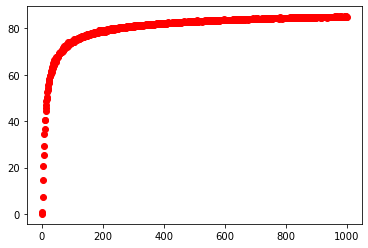

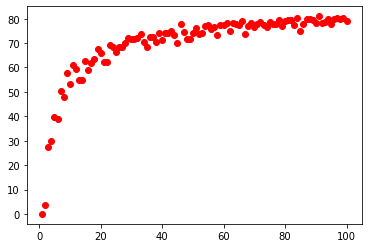

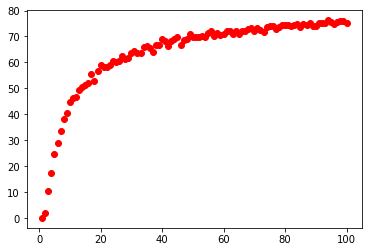

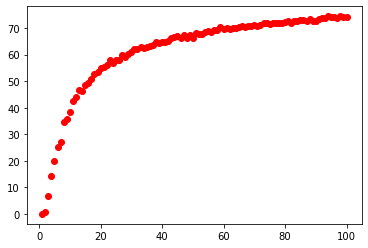

In [7]:
#Sample 100 uniformly distributed random vectors
V=sam(100,2)
print(V)

#compute the average of these minimum angles.
aver=getaver(100,2)
print(aver)

#Repeat the above for dimensions d = 1, . . . , 1000 and use the results to plot the
#average minimum angle against the dimension
plotgragh(100,1000)# it takes some 5 minutes...

#Give an interpretation of the result.
#Answer: the more dimensions the vectors have, the bigger angles they have to each other

#Does the result change if the sample size increases
plotgragh(10,100)
plotgragh(50,100)
plotgragh(100,100)